### Mini Programming Assignment 6: Implementing a Breadth-First Search Algorithm
###### *Notebook created by: Jacob Kreider*

In the following notebook, I will generate a graph network of one-way connections between people. I will then create and implement a simple breadth-first search algorithm to search for names within the levels of that network, and chart the execution times for various searches.

In [0]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import string, random
from collections import deque


In [0]:
# You can use the breadth-first algorithm for this assignment 
# from Grokking Algorithms (Bhargava 2016) or create your own.

# A slightly modified version of the Grokking book function
def search(name):
    search_queue = deque()
    search_queue += myGraph["initialize"]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person == name:
                
                return True
            else:
                search_queue += myGraph[person]
                # Marks this person as searched
                searched.append(person)
    return False


In [0]:
#Create a five level 'connections' graph (all unique, no duplicates).
#First level should have five people and each person in first level 
#should have five connections (they can be exclusive to one person or 
#shared with other members on the same level, but all five should be unique, no duplicates)

#Create graph with each subsequent level as one-way connection to the above level

myGraph = {}
# Level 0
myGraph["initialize"] = ["Jacob", "Michael", "Koebley", "Jeff", "Sara"]
# Level 1
myGraph["Jacob"]  = ["Lindsey", "Markel", "Ben", "David", "Lauren"]
myGraph["Michael"] = ["Lindsey", "Markel", "Ben", "David", "Lauren"]
myGraph["Koebley"] = ["Lindsey", "Markel", "Ben", "David", "Lauren"]
myGraph["Jeff"] = ["Lindsey", "Markel", "Ben", "David", "Lauren"]
myGraph["Sara"] = ["Lindsey", "Markel", "Ben", "David", "Lauren"]
# Level 2
myGraph["Lindsey"] = ["Emma", "Olivia", "Ava", "Isabella", "Sophia"]
myGraph["Markel"] = ["Emma", "Olivia", "Ava", "Isabella", "Sophia"]
myGraph["Ben"] = ["Emma", "Olivia", "Ava", "Isabella", "Sophia"]
myGraph["David"] = ["Emma", "Olivia", "Ava", "Isabella", "Sophia"]
myGraph["Lauren"] = ["Emma", "Olivia", "Ava", "Isabella", "Sophia"]
# Level 3
myGraph["Emma"] = ["Mia", "Charlotte", "Amelia", "Evelyn",  "Abigail"]
myGraph["Olivia"] = ["Mia", "Charlotte", "Amelia", "Evelyn",  "Abigail"]
myGraph["Ava"] = ["Mia", "Charlotte", "Amelia", "Evelyn",  "Abigail"]
myGraph["Isabella"] = ["Mia", "Charlotte", "Amelia", "Evelyn",  "Abigail"]
myGraph["Sophia"] = ["Mia", "Charlotte", "Amelia", "Evelyn",  "Abigail"]
# Level 4
myGraph["Mia"] = ["Jordan", "Eva", "Dominic", "Emilia", "Austin"]
myGraph["Charlotte"] = ["Jordan", "Eva", "Dominic", "Emilia", "Austin"]
myGraph["Amelia"] = ["Jordan", "Eva", "Dominic", "Emilia", "Austin"]
myGraph["Evelyn"] = ["Jordan", "Eva", "Dominic", "Emilia", "Austin"]
myGraph["Abigail"] = ["Jordan", "Eva", "Dominic", "Emilia", "Austin"]
# Level 5
myGraph["Jordan"] = ["Sean", "Shawn", "Shaun", "Shauna", "Sinn"]
myGraph["Eva"] = ["Sean", "Shawn", "Shaun", "Shauna", "Sinn"]
myGraph["Dominic"] = ["Sean", "Shawn", "Shaun", "Shauna", "Sinn"]
myGraph["Emilia"] = ["Sean", "Shawn", "Shaun", "Shauna", "Sinn"]
myGraph["Austin"] = ["Sean", "Shawn", "Shaun", "Shauna", "Sinn"]
# Level 6
myGraph["Sean"] = []
myGraph["Shawn"] = []
myGraph["Shaun"] = []
myGraph["Shauna"] = []
myGraph["Sinn"] = []

In [0]:
# Now search for one person on first level, then two on second (they should 
# be connected to the same person), then three on third level (they should be 
# connected to the same person), then four on the fourth level (they should be 
# connected to the same person), then five on the fifth level (they should be 
#connected to the same person)

# Capture time for each search at each level

# One name at level 1
iteration = 0
levelOneTime = 0

while iteration < 1001:
  start = time.clock()
  search("Jeff")
  
  stop = time.clock()

  levelOneTime += (stop - start) 
  iteration += 1

# Two names at level 2
iteration = 0
levelTwoTime = 0
searchList = ["Lindsey", "Ben"]

while iteration < 1001:
  start = time.clock()
  
  for name in searchList:
    search(name)
  
  stop = time.clock()

  levelTwoTime += (stop - start)
  iteration += 1

# Three names at level 3

iteration = 0
levelThreeTime = 0
searchList = ["Mia", "Charlotte", "Amelia"]

while iteration < 1001:
  start = time.clock()

  for name in searchList:
    search(name)
  
  stop = time.clock()

  levelThreeTime += (stop - start)
  iteration += 1


# Four names at level 4
searchList = ["Jordan", "Eva", "Dominic", "Emilia"]
iteration = 0
levelFourTime = 0

while iteration < 1001:
  start = time.clock()

  for name in searchList:
    search(name)
  
  stop = time.clock()

  levelFourTime += (stop - start)
  iteration += 1

# Five names at level 5
searchList = ["Sean", "Shawn", "Shaun", "Shauna", "Sinn"]
iteration = 0
levelFiveTime = 0

while iteration < 1001:
  start = time.clock()

  for name in searchList:
    search(name)
  
  stop = time.clock()

  levelFiveTime += (stop - start)
  iteration += 1


In [17]:
# Organize the results of the study into an table showing the 'name' 
# that you searched for, the level of the search (first, second, third, 
# fourth, fifth), and the time it took.

searchResults = pd.DataFrame(np.array([["Jacob", "Level 1"
                                        , round(levelOneTime,3)]
                                     , ["Lindsey, Ben", "Level 2"
                                        , round(levelTwoTime, 3)]
                                     , ["Mia, Charlotte, Amelia", "Level 3"
                                        , round(levelThreeTime, 3)]
                                     , ["Jordan, Eva, Dominic, Emilia", "Level 4"
                                         , round(levelFourTime, 3)]
                                     , ["Sean, Shawn, Shaun, Shauna, Sinn", "Level 5"
                                         , round(levelFiveTime, 3)]])
                                     , columns = ["Names Searched", "Level Searched"
                                         , "Search Time (ms)"])

searchResults

,Names Searched,Level Searched,Search Time (ms)
0,Jacob,Level 1,0.003
1,"Lindsey, Ben",Level 2,0.009
2,"Mia, Charlotte, Amelia",Level 3,0.058
3,"Jordan, Eva, Dominic, Emilia",Level 4,0.115
4,"Sean, Shawn, Shaun, Shauna, Sinn",Level 5,0.201


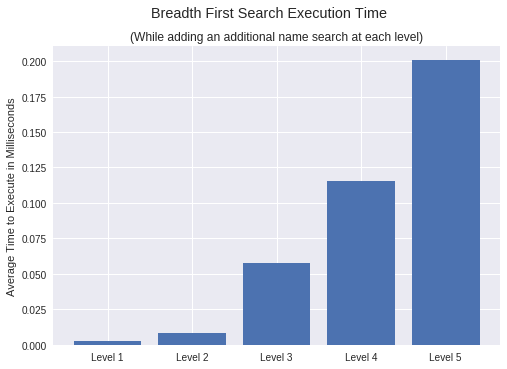

In [18]:
# Create a graph and compare times at each level 

plt.bar(["Level 1", "Level 2", "Level 3", "Level 4", "Level 5"]
        , [levelOneTime, levelTwoTime, levelThreeTime, levelFourTime
           , levelFiveTime])
plt.ylabel('Average Time to Execute in Milliseconds')
plt.suptitle('Breadth First Search Execution Time')
plt.title('(While adding an additional name search at each level)')
plt.show()

0.0028649999999963427

##### Executive Summary

The above breadth-first algorithm searches nodes of the graph network along edges, meaning that every time it searches a name (as long as that name ), it appends the nodes directly connected below that name to the search queue. 

As such, it will take O(V + E) time to search through the entire graph (V = vertices, or, nodes, and E = edges). Depending on the complexity of the graph network, this linear time expense could quickly become untenable. 

I would recommend breadth-first search only in instances where the graph size is known and limited-- this algorithm could cause efficiency issues on a large graph with complex connections.